In [3]:
library("pcalg")
library(tidyr)
library(igraph)
library(tableone)
library(MatchIt)
library("Rgraphviz")


Attache Paket: 'igraph'


Das folgende Objekt ist maskiert 'package:tidyr':

    crossing


Die folgenden Objekte sind maskiert von 'package:stats':

    decompose, spectrum


Das folgende Objekt ist maskiert 'package:base':

    union


Lade n"otiges Paket: graph

Lade n"otiges Paket: BiocGenerics


Attache Paket: 'BiocGenerics'


Die folgenden Objekte sind maskiert von 'package:igraph':

    normalize, path, union


Die folgenden Objekte sind maskiert von 'package:stats':

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attache Paket: 'graph'


Die folgend

In [4]:
#load data
data <- read.csv("/Users/cloecortesbalcells/Desktop/tristan/soc_eco_df_infected_muni.csv")

In [5]:
#renaming columns with difficult names
#colnames(data)[1] <- "id"
#colnames(data)[3] <- "age"
#colnames(data)[5] <- "canton"
#colnames(data)[6] <- "munic"
#colnames(data)[7] <- "nip"
#colnames(data)[14] <- "infection"
#case_death (column 11), 1= died and 0 = didn't die
#data[11][is.na(data[11])] <- 0
#data[14][is.na(data[14])] <- 0
#data[10][is.na(data[10])] <- 0
#data[3][is.na(data[3])] <- 0
#data[4][is.na(data[4])] <- 0
colnames(data)
data

[1] "X"                                "Unnamed..0"                      
 [3] "id"                               "age"                             
 [5] "bikeAvailability"                 "carAvail"                        
 [7] "employed"                         "hasLicense"                      
 [9] "home_x"                           "home_y"                          
[11] "householdIncome"                  "isCarPassenger"                  
[13] "municipalityType"                 "ptHasGA"                         
[15] "ptHasHalbtax"                     "ptHasStrecke"                    
[17] "ptHasVerbund"                     "sex"                             
[19] "spRegion"                         "ov_guteklasse"                   
[21] "Lat"                              "Lon"                             
[23] "lat_lon"                          "postcode"                        
[25] "infected"                         "MuniZIP"                         
[27] "NbrResident"                      "Change."                         
[29] "PopDensitiyPer_km.."              "Strangers."                      
[31] "Pop..0.19."                       "Pop20"                           
[33] "Pop65"                            "MarriageRate"                    
[35] "DivorceRate"                      "NatalityRate"                    
[37] "MortalityRate"                    "PrivateHouseholds"               
[39] "MeanSizeHouseholdsPerPerson"      "TotSurfacePer_km.."              
[41] "HabitationInfrastructureSurface." "HabInfraSurface_VariationHa"     
[43] "AgricolSurface."                  "AgriSurface_VariationHa"         
[45] "WoodenSurface."                   "ImproductiveSurface."            
[47] "TotalEmplois"                     "Employement1Sector"              
[49] "Employement2Sector"               "Employement3Sector"              
[51] "TotalEtablissement"               "Etablissement1Sector"            
[53] "Etablissement2Sector"             "Etablissement3Sector"            
[55] "VacantUnitsRate"                  "NewHomes1000habs"                
[57] "SocialSecurityRate"               "PLR"                             
[59] "PDC"                              "PS"                              
[61] "UDC"                              "PEV.PCS"                         
[63] "PVL"                              "PBD"                             
[65] "PST"                              "PES"                             
[67] "SmallRightParties"                "rich"                            
[69] "poor"                             "female"                          
[71] "interactemployed_poor"

X,Unnamed..0,id,age,bikeAvailability,carAvail,employed,hasLicense,home_x,home_y,⋯,PEV.PCS,PVL,PBD,PST,PES,SmallRightParties,rich,poor,female,interactemployed_poor
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
0,136274,16267,52,FOR_ALL,never,0,no,2677869,1241253,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,0
1,136751,19035,44,FOR_ALL,sometimes,1,yes,2677562,1241044,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,1
2,136763,19118,64,FOR_ALL,always,1,yes,2677950,1242072,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,1
3,136657,18482,56,FOR_NONE,always,0,yes,2678204,1240971,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,0
4,136474,17468,24,FOR_NONE,always,1,yes,2677726,1240882,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,1
5,136117,15309,61,FOR_ALL,always,1,yes,2678409,1242167,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,0,0,1,1
6,136087,15165,41,FOR_ALL,always,1,yes,2678049,1241098,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,1
7,136240,16108,63,FOR_ALL,always,1,yes,2677468,1241124,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,1
8,136305,16399,19,FOR_ALL,always,0,yes,2678089,1242040,⋯,4.194018,16.23794,1.2840304128,0.1760131577,12.36853,1.385022,1,0,1,0


In [28]:
female<-as.numeric(data$sex=='f')
age<-data$age
#casedeath<-as.numeric(data$case_death=='1')
infection<-data$infected
employed<-data$employed
carAvail<-as.numeric(data$carAvail=='always')
carAvail<-as.numeric(data$carAvail=='sometimes')
rich <- as.numeric(data$householdIncome > 5000)
city <- as.numeric(data$municipalityType == 'urban')
interactemployed_poor<- (as.numeric(data$householdIncome < 11000) && as.numeric(data$employed=='True'))
MeanSizeHouseholdsPerPerson <- data$MeanSizeHouseholdsPerPerson
bikeAvailability<-as.numeric(data$bikeAvailability=='FOR_ALL')
bikeAvailability<-as.numeric(data$bikeAvailability=='FOR_SOME')
Pop0<- data$Pop..0.19.
Pop20 <- data$Pop20
Pop65 <- data$Pop65	
PopDensitiyPer_km <-data$PopDensitiyPer_km
Employement1Sector<-data$Employement1Sector
Employement2Sector<-data$Employement2Sector
Employement3Sector<-data$Employement3Sector

In [29]:
#pas pris les autres car ce sont des dates, ne fonctionne 
#peut-être pas si l'évènement n'a pas eu lieu

sample<-cbind(age,rich, MeanSizeHouseholdsPerPerson,PopDensitiyPer_km , Pop65,infection)

sample<-data.frame(sample)
sample

age,rich,MeanSizeHouseholdsPerPerson,PopDensitiyPer_km,Pop65,infection
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,2.384186,749.9327,16.52907,1
44,1,2.384186,749.9327,16.52907,1
64,1,2.384186,749.9327,16.52907,1
56,1,2.384186,749.9327,16.52907,1
24,1,2.384186,749.9327,16.52907,1
61,1,2.384186,749.9327,16.52907,1
41,1,2.384186,749.9327,16.52907,1
63,1,2.384186,749.9327,16.52907,1
19,1,2.384186,749.9327,16.52907,1


In [41]:
psmodel<-glm(infection ~ log(age) + female +log(Pop65) + log(Pop20) +log(PopDensitiyPer_km), family=poisson(), data=sample)
summary(psmodel)
pscore<-psmodel$fitted.values


Call:
glm(formula = infection ~ log(age) + female + log(Pop65) + log(Pop20) + 
    log(PopDensitiyPer_km), family = poisson(), data = sample)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5083  -0.4058  -0.3845  -0.3549   2.1618  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            10.44229    1.62705   6.418 1.38e-10 ***
log(age)               -0.15431    0.01219 -12.659  < 2e-16 ***
female                 -0.03929    0.01526  -2.575     0.01 *  
log(Pop65)             -0.79429    0.09845  -8.068 7.17e-16 ***
log(Pop20)             -2.78562    0.35372  -7.875 3.40e-15 ***
log(PopDensitiyPer_km)  0.18062    0.01348  13.399  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89259  on 230252  degrees of freedom
Residual deviance: 88738  on 230247  degrees of freedom
AIC: 123160

Number of Fisher Scoring itera


Call:
matchit(formula = infection ~ log(age) + female + log(Pop65) + 
    log(Pop20) + log(PopDensitiyPer_km), data = sample, method = "nearest")

Summary of Balance for All Data:
                       Means Treated Means Control Std. Mean Diff. Var. Ratio
distance                      0.0768        0.0746          0.1926     0.8489
log(age)                      3.5855        3.6484         -0.1200     0.7479
female                        0.4862        0.4980         -0.0237          .
log(Pop65)                    2.7893        2.8056         -0.1114     0.9369
log(Pop20)                    4.1625        4.1572          0.0991     0.9482
log(PopDensitiyPer_km)        7.5395        7.4021          0.1464     0.8475
                       eCDF Mean eCDF Max
distance                  0.0497   0.0877
log(age)                  0.0468   0.1020
female                    0.0118   0.0118
log(Pop65)                0.0302   0.0510
log(Pop20)                0.0309   0.0474
log(PopDensitiyPer_km

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

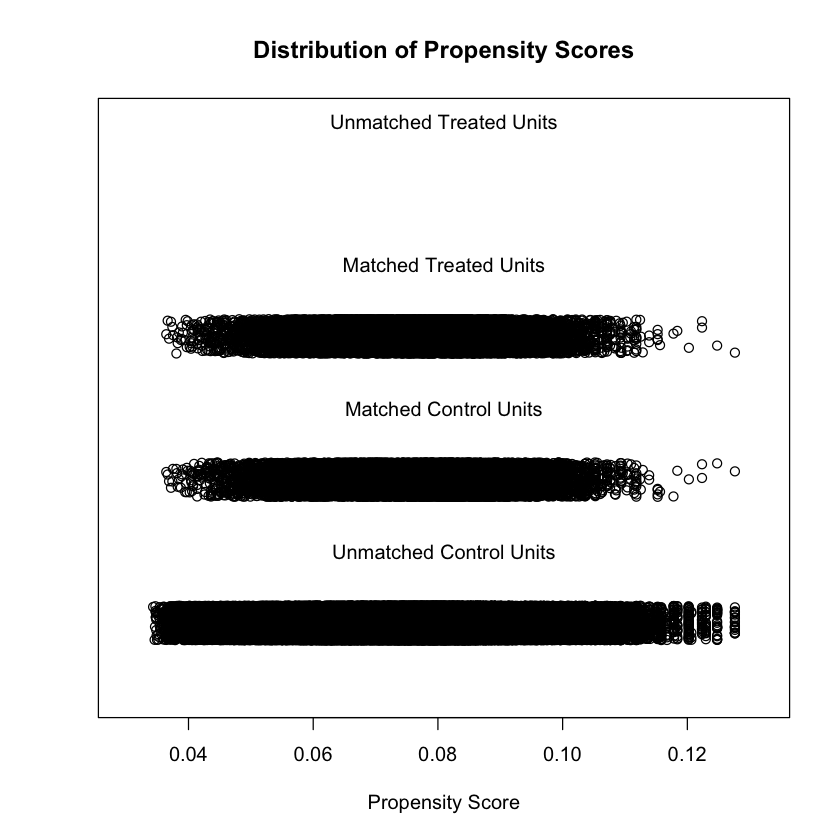

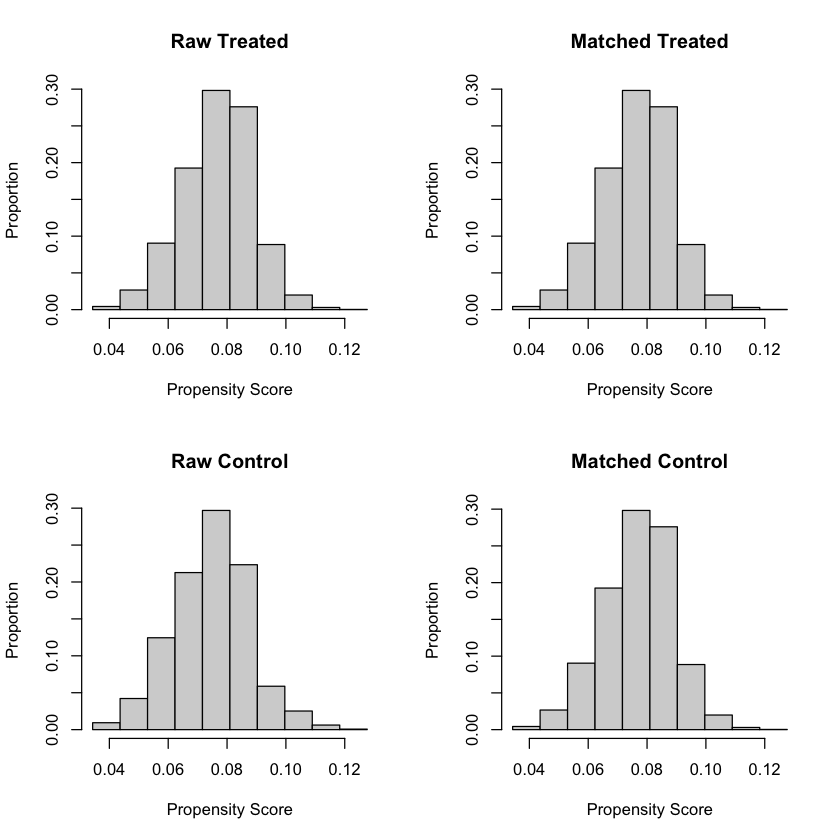

In [42]:
m.out <-matchit(infection ~ log(age) + female +log(Pop65) + log(Pop20) +log(PopDensitiyPer_km)      , data=sample, method="nearest")
summary(m.out)

#propensity score plots

plot(m.out, type="jitter")
plot(m.out, type="hist")

In [ ]:
#do greedy matching on logit(PS)
psmatch<-match(Tr=sample$infection, M=1, X=logit(pscore), replace=FALSE)
matched<-sample[unlist(psmatch[c("index.treated", "index.control")]), ]
xvars<-c("age", "mean", "death")
matchedtab1<-CreateTableOne(vars=xvars, strata ="infection",
data=matched, test = FALSE)
print(matchedtab1, smd = TRUE)

ERROR: Error in logit(pscore): konnte Funktion "logit" nicht finden
